## Computer simulation of the Ising Model

In [40]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy as sci
import pandas as pd
import numpy as np

In [51]:
dim = 10

In [52]:
# lattice = np.random.randint(2, size=(dim, dim))
# for l in range(dim):
#     for a in range(dim):
#         if lattice[l][a] == 0: lattice[l][a] = -1

In [53]:
# # Plotting lattice
# plt.matshow(lattice)
# plt.show()

In [54]:
def flipspin(sp):
    if sp == -1: return 1
    else:
        return -1

In [55]:
# boundary condition preservation function
def bc(i):
    if i >= dim:
        return 0
    if i < 0:
        return dim - 1
    else:
        return i

In [56]:
def init():
    lattice = np.random.randint(2, size=(dim, dim))
    for l in range(dim):
        for a in range(dim):
            if lattice[l][a] == 0: lattice[l][a] = -1
                
    return lattice

In [57]:
i = 0
J = 1
k = 2
T = 2
#while i != 1000:
def animate(i):
    ri = np.random.randint(dim)
    rj = np.random.randint(dim)
    lattice[ri][rj] = flipspin(lattice[ri][rj])
    delta_energy = -1 * lattice[ri][rj] * (lattice[bc(ri-1)][rj] + lattice[bc(ri+1)][rj]
                                         + lattice[ri][bc(rj-1)] + lattice[ri][bc(rj+1)])
    
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / i * -2): #last const is Temp
        pass
    else:
        lattice[ri][rj] = flipspin(lattice[ri][rj])
        
    showm.set_array(lattice)

<IPython.core.display.Javascript object>


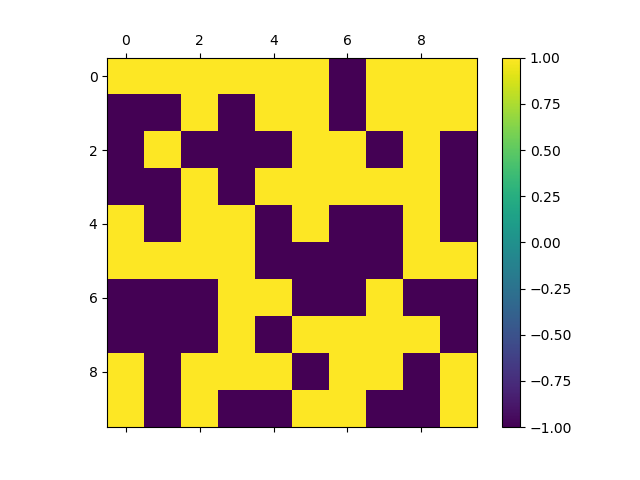

In [50]:
fig, ax = plt.subplots()
showm = ax.matshow(lattice)
plt.colorbar(showm)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=600, interval=20, blit=True)

# # save the animation as an mp4.  This requires ffmpeg or mencoder to be
# # installed.  The extra_args ensure that the x264 codec is used, so that
# # the video can be embedded in html5.  You may need to adjust this for
# # your system: for more information, see
# # http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

<IPython.core.display.Javascript object>


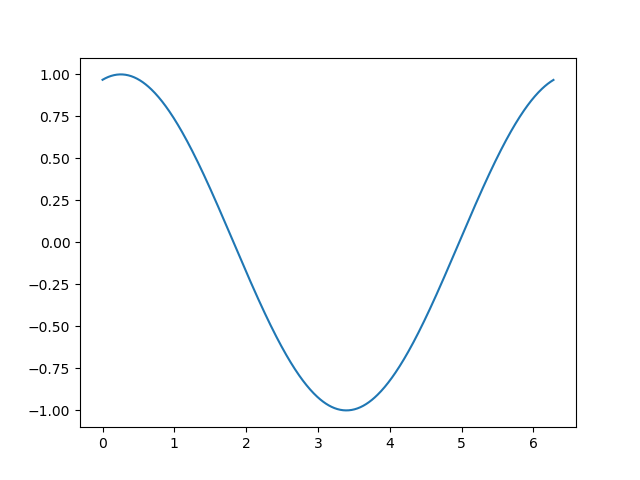

In [26]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

<IPython.core.display.Javascript object>


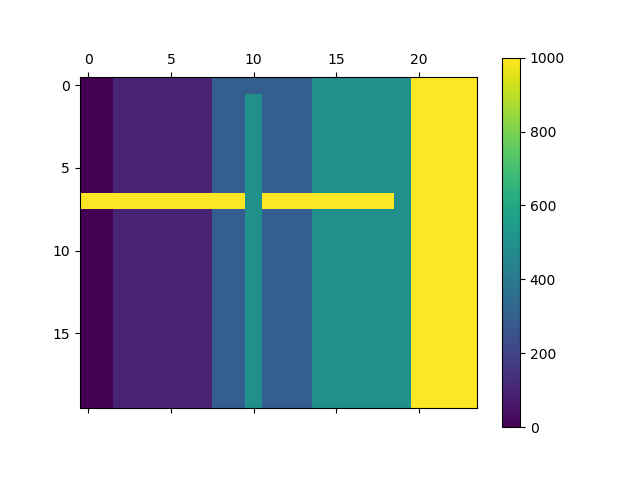

In [27]:
M=np.array([[0,0,100,100,100,100,100,100,300,300,300,300,300,300,500,500,500,500,500,500,1000,1000,1000,1000] for i in range(0,20)]) 

def update(i):
    M[7,i] = 1000
    M[19-i,10] = 500
    matrice.set_array(M)

fig, ax = plt.subplots()
matrice = ax.matshow(M)
plt.colorbar(lattice)

ani = animation.FuncAnimation(fig, update, frames=19, interval=500)
plt.show()